In [49]:
import numpy as np
import pandas as pd
from matplotlib import animation
from IPython.display import display, Image
import matplotlib.pyplot as plt

In [50]:
# Read the CSV file into a dataframe
df = pd.read_csv('../data/IronOreFlotation_cleaned_data.csv', index_col='date', parse_dates=['date'])
df.describe().T

count         mean          std         min  \
d feed iron %         7306.0    54.198177     4.118539   42.740000   
d feed silica %       7306.0    17.129728     6.180411    1.310000   
u starch m3/h         7306.0  2957.635581  1116.279220   19.683728   
u amina m3/h          7306.0   498.194264    88.152945  242.194085   
d feed m3/h           7306.0   397.153616    10.108265  376.417095   
d feed ph             7306.0     9.728180     0.408273    8.753379   
d feed SG             7306.0     1.686009     0.065240    1.519881   
x C01.air.flow Nm3/h  7306.0   283.704613    27.189643  175.948452   
x C02.air.flow Nm3/h  7306.0   283.773019    26.626376  177.081208   
x C03.air.flow Nm3/h  7306.0   283.564616    26.099668  180.291660   
x C04.air.flow Nm3/h  7306.0   299.895751     2.162330  293.276273   
x C05.air.flow Nm3/h  7306.0   298.879289     2.747931  287.398025   
x C06.air.flow Nm3/h  7306.0   294.465478    29.474829  194.568562   
x C07.air.flow Nm3/h  7306.0   292.774018    25.705554  198.861500   
x C01.froth.depth mm  7306.0   497.820386   111.994817  153.881071   
x C02.froth.depth mm  7306.0   503.936184   107.613138  211.871778   
x C03.froth.depth mm  7306.0   507.684127   133.051088  129.096589   
x C04.froth.depth mm  7306.0   417.230175    81.475740  162.621048   
x C05.froth.depth mm  7306.0   420.245050    77.061885  175.895235   
x C06.froth.depth mm  7306.0   429.991714    79.520180  197.542655   
x C07.froth.depth mm  7306.0   414.672145    73.270364  178.898402   
y product iron %      7306.0    64.894080     1.152226   62.050000   
y product silica %    7306.0     2.450738     1.155912    0.660000   

                              25%          50%          75%          max  
d feed iron %           51.870000    54.290000    56.650000    65.780000  
d feed silica %         13.040000    16.620000    21.290000    33.400000  
u starch m3/h         2139.050000  3019.775000  3761.738750  6289.636925  
u amina m3/h           445.070625   514.600750   559.954125   739.012922  
d feed m3/h            396.964750   399.683000   401.074000   418.549787  
d feed ph                9.483356     9.752245    10.006300    10.807715  
d feed SG                1.660685     1.702030     1.728919     1.852899  
x C01.air.flow Nm3/h   250.244875   299.805500   300.017000   367.932734  
x C02.air.flow Nm3/h   250.610750   299.590750   300.172000   311.309000  
x C03.air.flow Nm3/h   250.166750   299.509500   299.857500   306.678735  
x C04.air.flow Nm3/h   299.743500   299.936000   300.127000   305.648925  
x C05.air.flow Nm3/h   298.920583   299.818500   300.091500   307.112209  
x C06.air.flow Nm3/h   298.195500   299.824750   300.480500   353.793500  
x C07.air.flow Nm3/h   297.869375   299.663000   300.516000   353.377500  
x C01.froth.depth mm   401.415000   468.415000   549.309250   861.363966  
x C02.froth.depth mm   431.235125   498.253250   539.774500   828.401750  
x C03.froth.depth mm   400.601125   462.984750   598.826750   886.113469  
x C04.froth.depth mm   353.833375   402.234000   478.366375   678.418818  
x C05.froth.depth mm   351.816500   400.586000   487.844125   674.758369  
x C06.froth.depth mm   354.643250   404.903250   483.227695   698.590998  
x C07.froth.depth mm   351.318375   400.322750   451.644875   658.873393  
y product iron %        64.200000    65.080000    65.730000    68.010000  
y product silica %       1.530000     2.100000     3.240000     5.530000

Generating the pairplot for all 23 features is slow, so it is commented out by default below.

In [51]:
import seaborn as sns
# sns.pairplot(df, diag_kind='kde')

array([<Axes: xlabel='date'>, <Axes: xlabel='date'>], dtype=object)

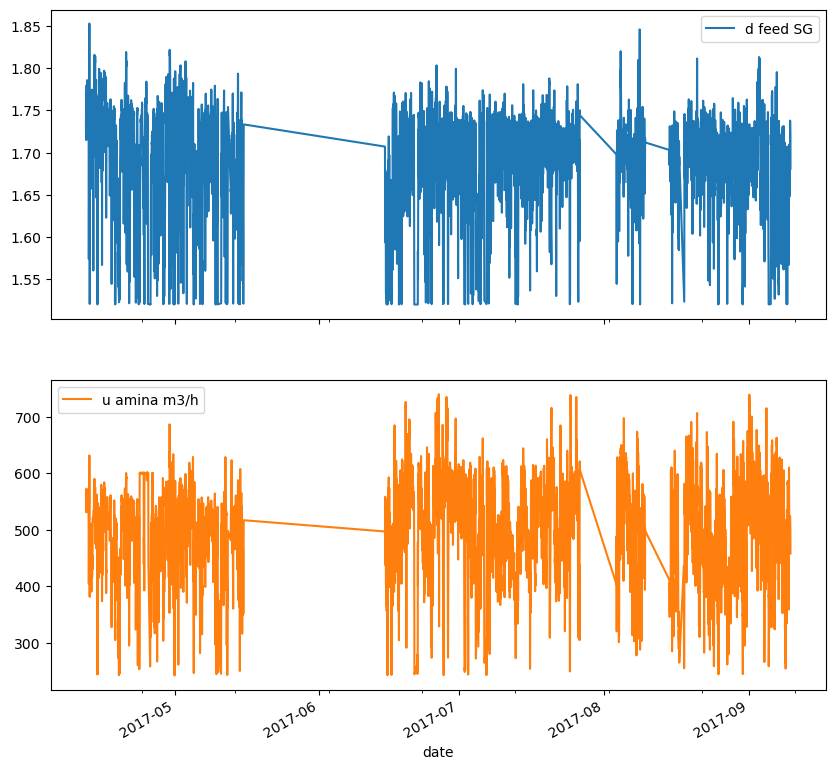

In [52]:
selectedVariables = ['d feed SG', 'u amina m3/h']
df[selectedVariables].plot(subplots=True, figsize=(10, 10))

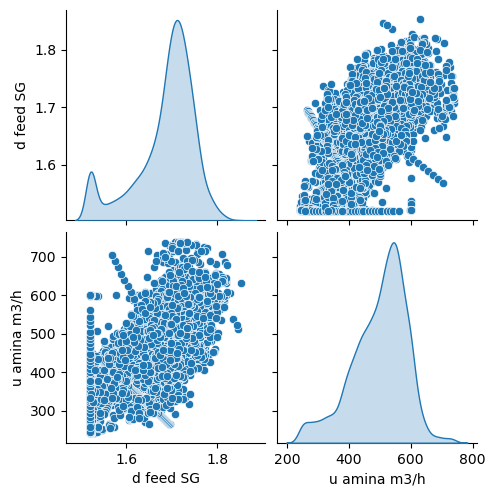

In [53]:
sns.pairplot(df[selectedVariables], diag_kind='kde')

[]

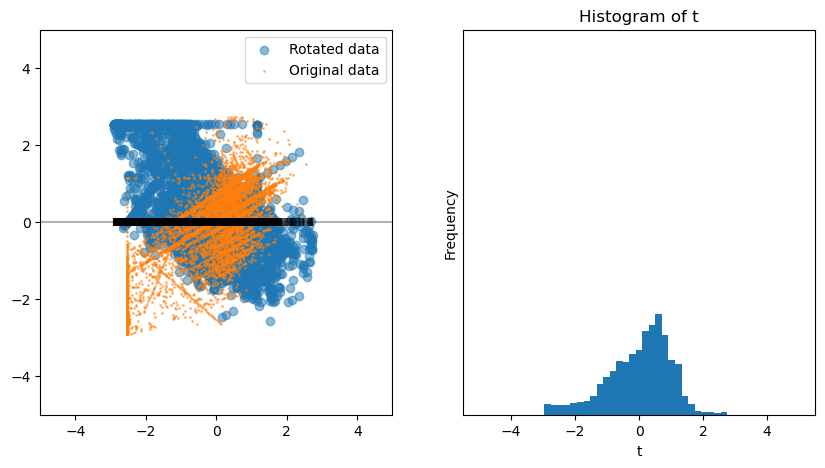

In [61]:
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(df[selectedVariables])

# Create rotation matrix
theta = 90/180*np.pi
Q = np.array([[np.cos(theta), -np.sin(theta)], [np.sin(theta), np.cos(theta)]])

# Rotate the data and plot
T = X @ Q

# Plot the original and the rotated data
fig,ax = plt.subplots(1,2, figsize = (10,5))
ax[0].clear()
ax[0].hlines(0, -20, 20, color = 'k', alpha = 0.3)  # PLot the t1-axis
ax[0].scatter(T[:,0], T[:,1], alpha = 0.5, label='Rotated data')
ax[0].scatter(X[:,0], X[:,1], alpha = 0.5, s = 1, label='Original data')
ax[0].scatter(T[:,0], np.zeros_like(T[:,0]), c='k', marker = '|', alpha = 0.2)    # Show the values of T projected onto the t1-axis
ax[0].set_xlim(-5, 5)
ax[0].set_ylim(-5, 5)
ax[0].legend()

# Draw a histogram of t1
ax[1].clear()
ax[1].hist(T[:,0], bins=np.linspace(-5,5,50),density=True)
ax[1].set_xlabel('t')
ax[1].set_ylabel('Frequency')
ax[1].set_title('Histogram of t')
ax[1].set_ylim(0, 2)
ax[1].set_yticks([])

The next piece of code creates an animation showing the data being rotated and projected onto the $t_1$ axis. It takes a minute or so to run, but the result is saved as a `.gif` file, so it need not be run every time. It is commented out below for speed.

Progress: 0.00%
Progress: 0.00%
Progress: 0.83%
Progress: 1.67%
Progress: 2.50%
Progress: 3.33%
Progress: 4.17%
Progress: 5.00%
Progress: 5.83%
Progress: 6.67%
Progress: 7.50%
Progress: 8.33%
Progress: 9.17%
Progress: 10.00%
Progress: 10.83%
Progress: 11.67%
Progress: 12.50%
Progress: 13.33%
Progress: 14.17%
Progress: 15.00%
Progress: 15.83%
Progress: 16.67%
Progress: 17.50%
Progress: 18.33%
Progress: 19.17%
Progress: 20.00%
Progress: 20.83%
Progress: 21.67%
Progress: 22.50%
Progress: 23.33%
Progress: 24.17%
Progress: 25.00%
Progress: 25.83%
Progress: 26.67%
Progress: 27.50%
Progress: 28.33%
Progress: 29.17%
Progress: 30.00%
Progress: 30.83%
Progress: 31.67%
Progress: 32.50%
Progress: 33.33%
Progress: 34.17%
Progress: 35.00%
Progress: 35.83%
Progress: 36.67%
Progress: 37.50%
Progress: 38.33%
Progress: 39.17%
Progress: 40.00%
Progress: 40.83%
Progress: 41.67%
Progress: 42.50%
Progress: 43.33%
Progress: 44.17%
Progress: 45.00%
Progress: 45.83%
Progress: 46.67%
Progress: 47.50%
Progress: 

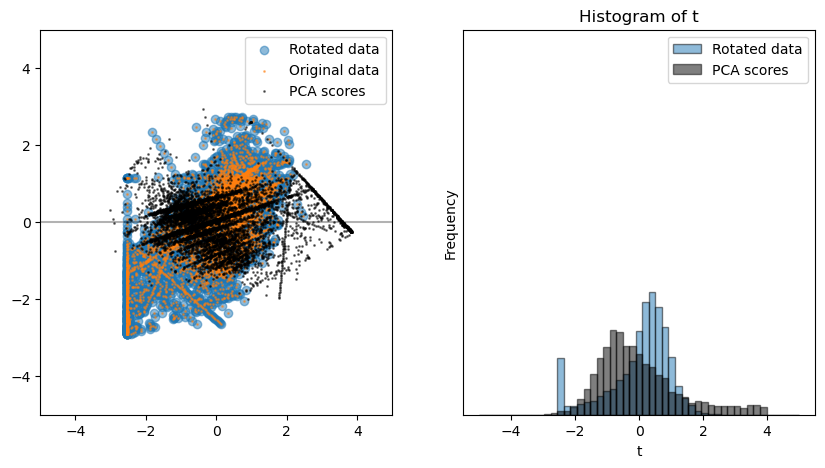

In [71]:
# from sklearn.decomposition import PCA
# pca = PCA()
# X_pca = pca.fit_transform(X)

# fig,ax = plt.subplots(1,2, figsize = (10,5))
# def AnimationFunction(t):
#     # Create rotation matrix
#     theta = 3*t/180*np.pi
#     Q = np.array([[np.cos(theta), -np.sin(theta)], [np.sin(theta), np.cos(theta)]])

#     # Rotate the data and plot
#     T = X @ Q

#     ax[0].clear()
#     ax[0].hlines(0, -20, 20, color = 'k', alpha = 0.3)  # PLot the t1-axis
#     ax[0].scatter(T[:,0], T[:,1], alpha = 0.5, label='Rotated data')
#     ax[0].scatter(X[:,0], X[:,1], alpha = 0.5, s = 1, label='Original data')
#     ax[0].scatter(X_pca[:,0], X_pca[:,1], alpha = 0.5, s = 1, c = 'k', label='PCA scores')    
# #     ax[0].scatter(T[:,0], np.zeros_like(T[:,0]), c='k', marker = '|', alpha = 0.2)    # Show the values of T projected onto the t1-axis
#     ax[0].set_xlim(-5, 5)
#     ax[0].set_ylim(-5, 5)
#     ax[0].legend()

#     # Draw a histogram of t1
#     ax[1].clear()
#     ax[1].hist(T[:,0], bins=np.linspace(-5,5,50),density=True, alpha = 0.5, edgecolor = 'k', label='Rotated data')
#     ax[1].hist(X_pca[:,0], bins=np.linspace(-5,5,50),density=True, alpha = 0.5, color = 'k', edgecolor = 'k', label='PCA scores')
#     ax[1].set_xlabel('t')
#     ax[1].set_ylabel('Frequency')
#     ax[1].set_title('Histogram of t')
#     ax[1].set_ylim(0, 2)
#     ax[1].set_yticks([])
#     ax[1].legend()

#     print(f"Progress: {t/120*100:.2f}%")

# # Create the animation and save to file
# anim = animation.FuncAnimation(fig, AnimationFunction, frames = 120, repeat=False)

# # Create animation without PCA projection
# # f = r"..\images\data-rotation.gif" 

# # Create animation with PCA projection
# f = r"..\images\data-rotation-PCA.gif" 

# writergif = animation.PillowWriter(fps=20) 
# anim.save(f, writer=writergif)

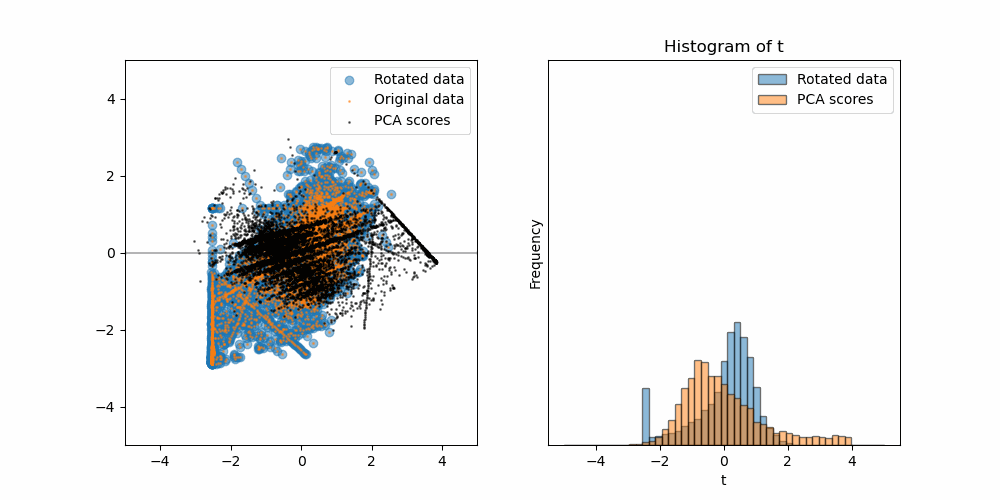

In [68]:
# Display the created gif
display(Image('..\images\data-rotation-PCA.gif'))

array([<Axes: xlabel='date'>, <Axes: xlabel='date'>,
       <Axes: xlabel='date'>], dtype=object)

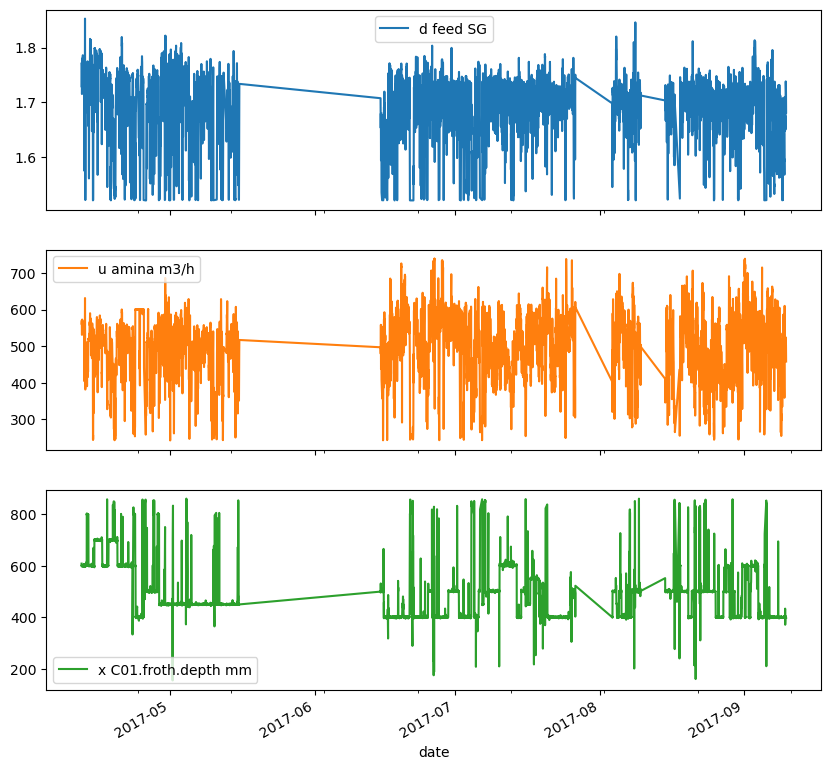

In [41]:
selectedVariables = ['d feed SG', 'u amina m3/h', 'x C01.froth.depth mm']
df[selectedVariables].plot(subplots=True, figsize=(10, 10))

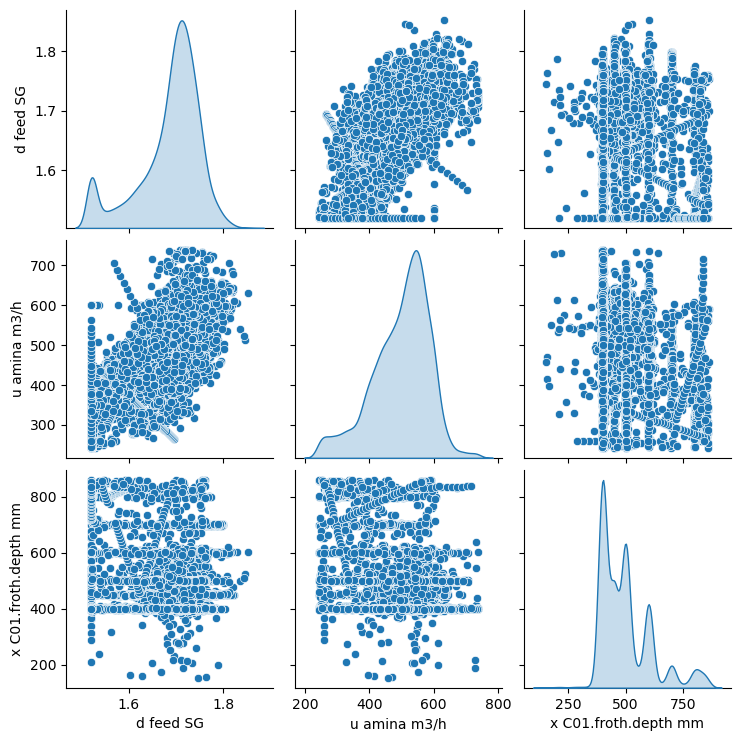

In [42]:
sns.pairplot(df[selectedVariables], diag_kind='kde')

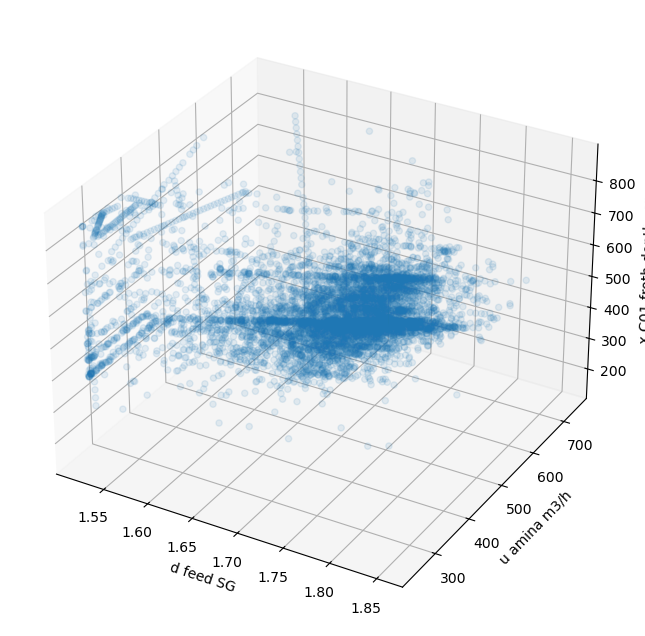

In [43]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df[selectedVariables[0]], df[selectedVariables[1]], df[selectedVariables[2]], alpha = 0.1)
ax.set_xlabel(selectedVariables[0])
ax.set_ylabel(selectedVariables[1])
ax.set_zlabel(selectedVariables[2])

plt.show()

(-5.0, 4.0)

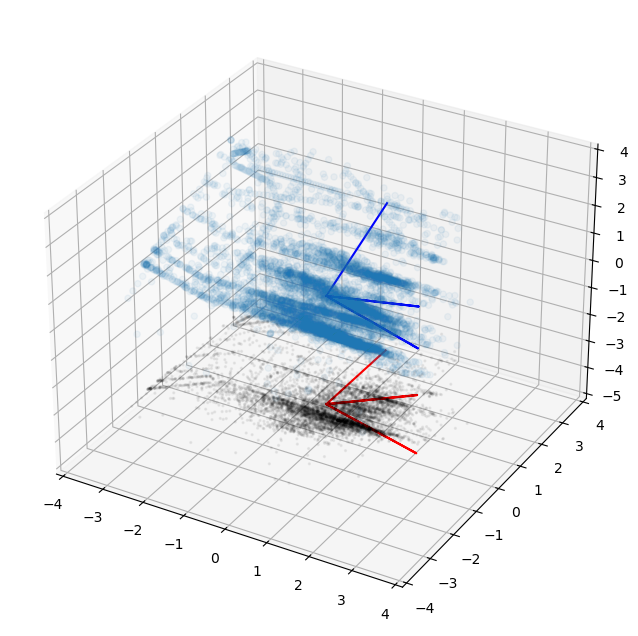

In [44]:
X = StandardScaler().fit_transform(df[selectedVariables])

# Define the rotation matrix, then rotate the scaled data
theta = 30/180*np.pi
phi = 60/180*np.pi
Q = ( np.array([[np.cos(theta), -np.sin(theta), 0], [np.sin(theta), np.cos(theta), 0],[0, 0, 1]])
    @np.array([[1, 0, 0], [0, np.cos(phi), -np.sin(phi)], [0, np.sin(phi), np.cos(phi)]]) )
T = X @ Q

# Calculate the projection of the original coordinate axes
B = 3*np.array([[0, 0, 0], [1, 0,0], [0,0 ,0],[0,1,0],[0,0,0],[0,0,1]])
TB = B @ Q

from mpl_toolkits.mplot3d import Axes3D
# Create a 3D scatter plot of the rotated data, showing the projection onto the t1-t2 plane
fig = plt.figure(figsize=(8, 8))
ax1 = fig.add_subplot(111, projection='3d')
ax1.clear()
ax1.scatter(T[:,0], T[:,1], T[:,2], alpha = 0.05)
ax1.scatter(T[:,0], T[:,1], 0*T[:,2] - 4, s = 2, c = 'k', alpha = 0.05)
ax1.plot(TB[:,0], TB[:,1], TB[:,2], c =  'blue')
ax1.plot(TB[:,0], TB[:,1], 0*TB[:,2] - 4, c = 'red')
ax1.axis('equal')
ax1.set_xlim([-4, 4])
ax1.set_ylim([-4, 4])
ax1.set_zlim([-5, 4])

The next piece of code again creates an animation showing the data being rotated and projected onto the $t_1$ axis. It takes a minute or so to run, but the result is saved as a `.gif` file, so it need not be run every time. It is commented out below for speed.

In [45]:
# fig = plt.figure(figsize=(8, 8))
# ax1 = fig.add_subplot(111, projection='3d')
# def AnimationFunction(t):
#      # Define the rotation matrix, then rotate the scaled data
#      theta = 3*t/180*np.pi
#      phi = 6*t/180*np.pi
#      Q = ( np.array([[np.cos(theta), -np.sin(theta), 0], [np.sin(theta), np.cos(theta), 0],[0, 0, 1]])
#           @np.array([[1, 0, 0], [0, np.cos(phi), -np.sin(phi)], [0, np.sin(phi), np.cos(phi)]]) )
#      T = X @ Q
     
#      B = 3*np.array([[0, 0, 0], [1, 0,0], [0,0 ,0],[0,1,0],[0,0,0],[0,0,1]])
#      TB = B @ Q
     
#      # Create a 3D scatter plot of the rotated data, showing the projection onto the t1-t2 plane
#      ax1.clear()
#      ax1.scatter(T[:,0], T[:,1], T[:,2], alpha = 0.05)
#      ax1.scatter(T[:,0], T[:,1], 0*T[:,2] - 4, s = 2, c = 'k', alpha = 0.05)
#      ax1.plot(TB[:,0], TB[:,1], TB[:,2], c =  'blue')
#      ax1.plot(TB[:,0], TB[:,1], 0*TB[:,2] - 4, c = 'red')
#      ax1.axis('equal')
#      ax1.set_xlim([-4, 4])
#      ax1.set_ylim([-4, 4])
#      ax1.set_zlim([-5, 4])
     
#      print(f"Progress: {t/120*100:.2f}%")

# anim = animation.FuncAnimation(fig, AnimationFunction, frames = 120, repeat=False)
# f = r"..\images\data-rotation-3D.gif"
# writergif = animation.PillowWriter(fps=20) 
# anim.save(f, writer=writergif)

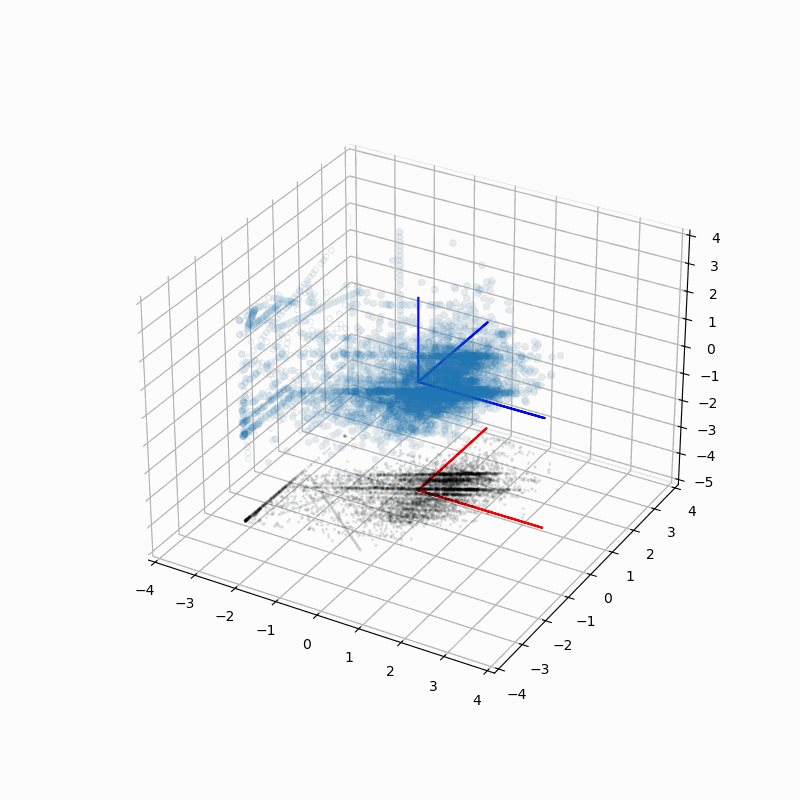

In [46]:
display(Image('..\images\data-rotation-3D.gif'))